In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set pd max rows
pd.set_option('display.max_rows', 500)

In [73]:
bank1 = pd.read_csv('simulated_transaction_2024.csv')
bank1.shape

(230596, 7)

In [74]:
#bank1 = pd.read_csv('simulated_transactions_2024_wo_accountNo.csv')
#bank1.shape
#bank1.head()

In [75]:
bank = pd.read_csv('df.csv')
bank.shape

(230372, 7)

In [76]:
bank.head()

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime
0,0,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01 00:00:00
1,1,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,2,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01 00:00:00
3,3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01 00:00:00
4,4,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01 00:00:00


In [77]:
#null values
bank.isnull().sum()

Unnamed: 0                     0
Account No                     0
Balance                        0
Amount                         1
Third Party Account No    223543
Third Party Name            7075
DateTime                       0
dtype: int64

In [78]:
# split DateTime into Date and Time
bank['Date'] = pd.to_datetime(bank['DateTime'],dayfirst=False ).dt.date
bank['Timestamp'] = pd.to_datetime(bank['DateTime']).dt.time
bank.head()

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
0,0,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01 00:00:00,2023-01-01,00:00:00
1,1,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01 00:00:00,2023-01-01,00:00:00
2,2,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
3,3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
4,4,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01 00:00:00,2023-01-01,00:00:00


In [79]:
# max and min dates in bank dataset
# convert 'Date' to datetime format'
#bank['Date'] = pd.to_datetime(bank['Date'],dayfirst=True)

# find the max and min dates in the dataset
#max_date = bank['Date'].max()
#min_date = bank['Date'].min()

# print the max and min dates
#print('Max date: ', max_date)
#print('Min date: ', min_date)

In [80]:
#bank['Time Pandas'] = pd.to_datetime(bank['Timestamp'],format= "%H:%M")
#bank['Time Pandas'] = bank['Time Pandas'].dt.time

In [81]:
#bank.head()

In [82]:
# Just get positive transactions into the balance
print('Number of unique accounts in original bank: ', len(bank['Account No'].unique()))
bank_amount_incomings = bank[bank['Amount'] > 0]

# remove rows with non-null values in 'Third Party Name' - i.e. merchant transactions
bank_amount_incomings = bank_amount_incomings[bank_amount_incomings['Third Party Name'].notnull()]

#check if there are any null values in the dataset
bank_amount_incomings.isnull().sum()

# print number of unique accounts
print('Number of unique accounts after filtering for incomings only: ', len(bank_amount_incomings['Account No'].unique()))

bank_amount_incomings.head(10)


# get account numbers who don't have any positive transactions from a Third Party Name merchant
accounts_no_incomings = bank[~bank['Account No'].isin(bank_amount_incomings['Account No'])]

print(f'No of accounts with no incoming transactions: {len(accounts_no_incomings["Account No"].unique())}')

Number of unique accounts in original bank:  976
Number of unique accounts after filtering for incomings only:  616
No of accounts with no incoming transactions: 360


In [83]:
# filter rows for only 2nd month of the year
# convert 'Date' to datetime format'
bank_amount_incomings['Date'] = pd.to_datetime(bank_amount_incomings['Date'],dayfirst=False)
bank_feb = bank_amount_incomings[bank_amount_incomings['Date'].dt.month == 2]

# get max and min dates in february
max_date_feb = bank_feb['Date'].max()
min_date_feb = bank_feb['Date'].min()

print('Max date in February: ', max_date_feb)
print('Min date in February: ', min_date_feb)

bank_feb.tail(15)


Max date in February:  2023-02-28 00:00:00
Min date in February:  2023-02-01 00:00:00


,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
38843,38843,833499132.0,2556.168350,2708.00,NaN,Halifax,2023-02-28 00:00:00,2023-02-28,00:00:00
38846,38846,859264768.0,1815.465942,1545.00,NaN,Vision Express,2023-02-28 00:00:00,2023-02-28,00:00:00
38849,38849,788740658.0,2537.061150,1675.00,NaN,Matalan,2023-02-28 00:00:00,2023-02-28,00:00:00
38850,38850,106601471.0,2845.874540,1675.00,NaN,Hobbycraft,2023-02-28 00:00:00,2023-02-28,00:00:00
38851,38851,696333897.0,1716.316000,1842.50,NaN,Jollyes,2023-02-28 00:00:00,2023-02-28,00:00:00
38854,38854,558875206.0,3076.427350,3125.00,NaN,CPA,2023-02-28 00:00:00,2023-02-28,00:00:00
38855,38855,331450202.0,3791.867700,3087.75,NaN,CPA,2023-02-28 00:00:00,2023-02-28,00:00:00
38856,38856,683078800.0,3375.129867,3126.00,NaN,LBG,2023-02-28 00:00:00,2023-02-28,00:00:00
38859,38859,651756497.0,6075.964878,4375.00,NaN,CPA,2023-02-28 00:00:00,2023-02-28,00:00:00
38860,38860,435984758.0,2746.848874,2250.00,NaN,LBG,2023-02-28 00:00:00,2023-02-28,00:00:00


- Potentially need to remove last month as it only goes up to the 6th so may miss some people's incomes coming in as they seem to come in throughout the month.

In [84]:
# drop transactions in december
bank_amount_incomings_without_dec = bank_amount_incomings[bank_amount_incomings['Date'].dt.month != 12]

# group by Account No and sum the 'Amount' for each account but normalise dividing by number of transactions for each account
income_per_account = bank_amount_incomings_without_dec.groupby('Account No')['Amount'].sum()

# calculate the annual income for each account
incomes=(income_per_account/11)*12 # multiply by 12 to get annual income
incomes_monthly = income_per_account/11

<Axes: xlabel='Amount', ylabel='Count'>

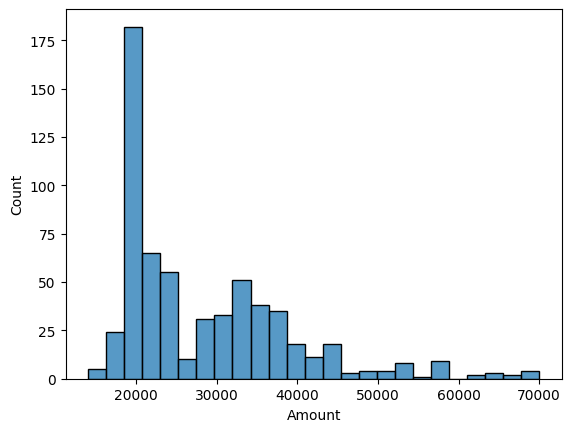

In [85]:
# kde plot of income per account
sns.histplot(incomes, fill=True,bins=25)

<Axes: xlabel='Amount', ylabel='Density'>

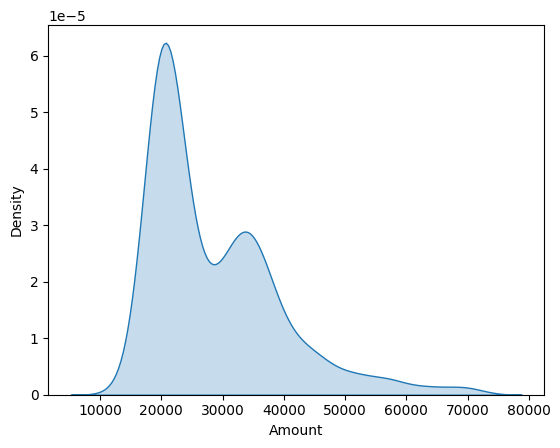

In [86]:
sns.kdeplot(incomes, fill=True)

Salary distribution seems to roughly align with [ONS Data](https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/bulletins/householddisposableincomeandinequality/yearending2018) in 2018

#### Studying distribution of salaries against an individuals spend

In [87]:
# get account numbers in bank_amount_incomings dataset
account_numbers = bank_amount_incomings['Account No'].unique()


# match df dataframe with these account numbers
df_salaried_people = bank[bank['Account No'].isin(account_numbers)]

df_salaried_people.head()

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
0,0,678330503.0,2971.00,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00,2023-01-01,00:00:00
1,1,472213568.0,3792.00,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00,2023-01-01,00:00:00
2,2,472213568.0,3012.00,-780.00,283027736.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00
4,4,624500124.0,3226.00,1825.00,NaN,Fat Face,2023-01-01 00:00:00,2023-01-01,00:00:00
5,5,203466392.0,4607.66,2841.66,NaN,Lavender Primary,2023-01-01 00:00:00,2023-01-01,00:00:00


In [88]:
# filter df_salaried_people for negative transactions
df_salaried_people_outgoings = df_salaried_people[df_salaried_people['Amount'] < 0]

# filter where the 'Third Party Name' is not null
df_salaried_people_outgoings = df_salaried_people_outgoings[df_salaried_people_outgoings['Third Party Name'].notnull()]

df_salaried_people_outgoings.head()

,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp
495,495,355733816.0,526.00,-664.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00
496,496,472213568.0,2412.00,-600.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00
497,497,624500124.0,2572.00,-654.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00
498,498,203466392.0,3935.66,-672.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00
499,499,768271776.0,2208.00,-632.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00


In [89]:
# remove Third Party Name == LBG or Halifax
df_salaried_people_outgoings = df_salaried_people_outgoings[~df_salaried_people_outgoings['Third Party Name'].isin(['LBG','Halifax'])]

# group by Account No and sum the 'Amount' for each account but normalise dividing by number of transactions for each account
salaried_people_outgoings_sum_trans = df_salaried_people_outgoings.groupby('Account No')['Amount'].sum()

salaried_people_outgoings_sum_trans.head()  

Account No
101531259.0    -7414.55
104832000.0    -6743.52
106601471.0    -7991.60
108481285.0   -11672.28
108563213.0   -16493.64
Name: Amount, dtype: float64

In [90]:
# join salaried_people_outgoings_sum_trans to income_per_account - merge on 'Account No'
salaried_people = pd.merge(income_per_account, salaried_people_outgoings_sum_trans , on='Account No', how='inner')

col_names = ['Income', 'Outgoing Spend']

salaried_people.columns = col_names

salaried_people.head()

,Income,Outgoing Spend
Account No,,
101531259.0,16967.5,-7414.55
104832000.0,18425.0,-6743.52
106601471.0,18425.0,-7991.60
108481285.0,17424.0,-11672.28
108563213.0,41239.0,-16493.64


In [91]:
# get frequency of transactions for each account from the df_salaried_people_outgoings dataset
salaried_people_outgoings_freq = df_salaried_people_outgoings['Account No'].value_counts()

salaried_people_outgoings_freq.head()

Account No
858989281.0    694
259015404.0    668
549414742.0    654
532478725.0    644
441274121.0    628
Name: count, dtype: int64

In [92]:
# merge this onto salaried_people
salaried_people = pd.merge(salaried_people, salaried_people_outgoings_freq, left_index=True, right_index=True, how='inner')

col_names = ['Income', 'Outgoing Spend', 'Frequency']

salaried_people.columns = col_names

# make Outgoing Spend positive
salaried_people['Outgoing Spend'] = salaried_people['Outgoing Spend'].abs()

salaried_people.head()

,Income,Outgoing Spend,Frequency
Account No,,,
101531259.0,16967.5,7414.55,100
104832000.0,18425.0,6743.52,126
106601471.0,18425.0,7991.60,182
108481285.0,17424.0,11672.28,342
108563213.0,41239.0,16493.64,386


In [95]:
# Set Account No as a column and reset the index
salaried_people.reset_index(inplace=True)

salaried_people.rename(columns={'index':'Account No'}, inplace=True)

salaried_people.head()

,Account No,Income,Outgoing Spend,Frequency
0,101531259.0,16967.5,7414.55,100
1,104832000.0,18425.0,6743.52,126
2,106601471.0,18425.0,7991.60,182
3,108481285.0,17424.0,11672.28,342
4,108563213.0,41239.0,16493.64,386


#### Ratio of spend to income

In [96]:
# calculate ratio of Outgoing Spend to Income
salaried_people['Outgoing to Income Ratio'] = salaried_people['Outgoing Spend']/salaried_people['Income']

salaried_people.head()

,Account No,Income,Outgoing Spend,Frequency,Outgoing to Income Ratio
0,101531259.0,16967.5,7414.55,100,0.436985
1,104832000.0,18425.0,6743.52,126,0.365998
2,106601471.0,18425.0,7991.60,182,0.433737
3,108481285.0,17424.0,11672.28,342,0.669897
4,108563213.0,41239.0,16493.64,386,0.399952


<Axes: xlabel='Outgoing to Income Ratio', ylabel='Count'>

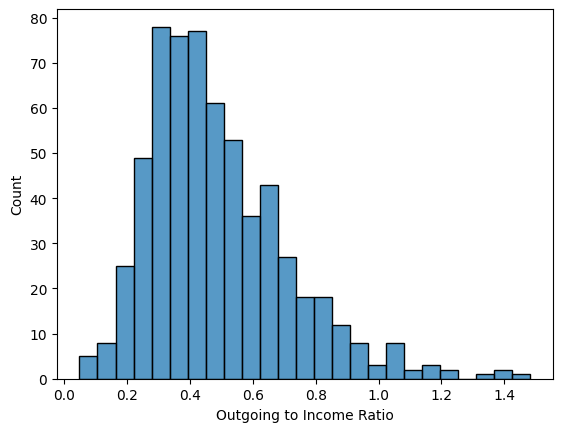

In [97]:
# plot distribution of Outgoing to Income Ratio
sns.histplot(salaried_people['Outgoing to Income Ratio'], fill=True,bins=25)

<Axes: xlabel='Outgoing to Income Ratio', ylabel='Density'>

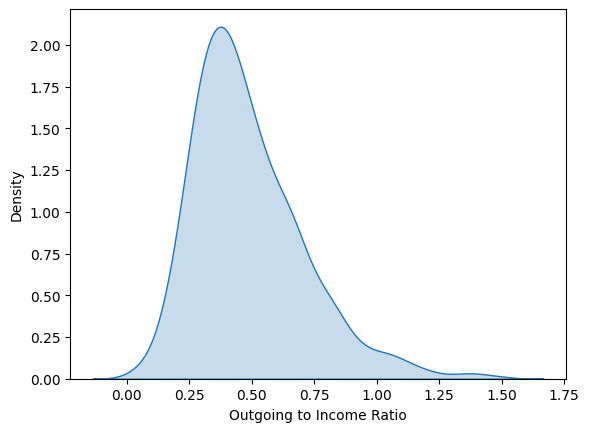

In [98]:
# plot distribution of Outgoing to Income Ratio kde plot
sns.kdeplot(salaried_people['Outgoing to Income Ratio'], fill=True)


#### Daily average number of transactions

<Axes: xlabel='count', ylabel='Count'>

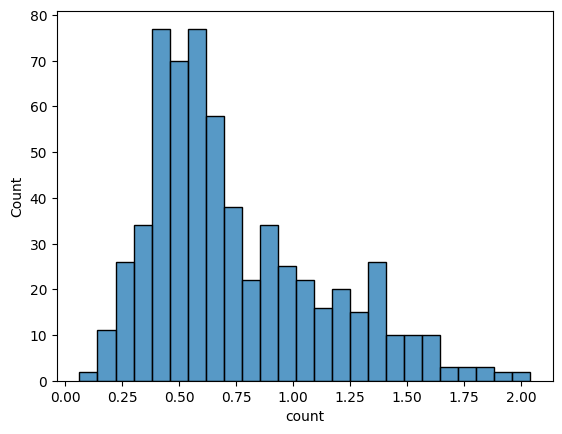

In [100]:
# calculate daily average number of transactions for each account from the df_salaried_people_outgoings dataset

# get the number of days in the dataset
days = df_salaried_people_outgoings['Date'].nunique()

# get the number of transactions for each account
salaried_people_outgoings_daily_avg = salaried_people_outgoings_freq/days

# plot distribution of daily average number of transactions
sns.histplot(salaried_people_outgoings_daily_avg, fill=True,bins=25)#